In [12]:
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm
from plotnine import *
import plotly.offline as pyo
pyo.init_notebook_mode(connected=True)
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.graph_objects as go
import plotly
import plotly.express as px
import imageio
import os
from collections import deque

%load_ext blackcellmagic

The blackcellmagic extension is already loaded. To reload it, use:
  %reload_ext blackcellmagic


In [16]:
def sierpinski_chaos_game(iterations=10000):
    # Vertices of the triangle
    vertices = np.array([[0, 0], [1, 0], [0.5, np.sqrt(3)/2]])
    
    # Starting point
    point = np.array([0.25, 0.25])
    points = [point]

    for _ in tqdm(range(iterations)):
        # Randomly select a vertex
        vertex = vertices[np.random.randint(3)]

        # Move halfway towards the selected vertex
        point = (point + vertex) / 2.0
        points.append(point)
    
    points_df = pd.DataFrame(np.array(points), columns=["x", "y"])
    points_df['time'] = points_df.index
    return points_df

# Generate points using the chaos game
points_df = sierpinski_chaos_game()

  0%|          | 0/10000 [00:00<?, ?it/s]

## Visualisation

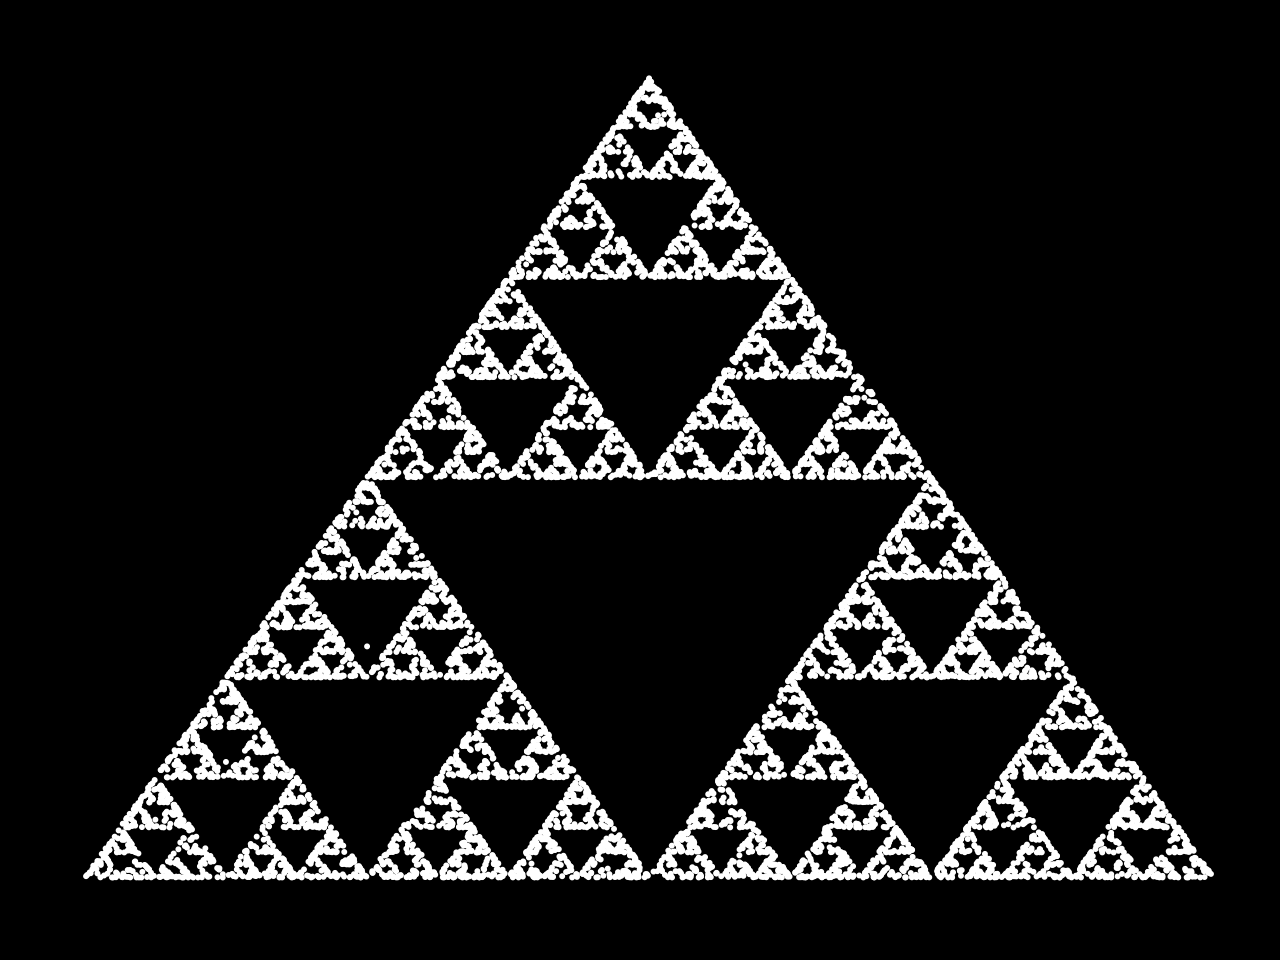

<Figure Size: (640 x 480)>

In [25]:
(
        ggplot(points_df, aes(x = 'x', y = 'y')) +
        geom_point(color = 'white', size = 0.2) +
        theme_void() +
        theme(legend_position='none') +
        theme(plot_background=element_rect(fill="black"))
)

In [24]:
# List to store file names
file_names = []

for i in tqdm(range(1, len(points_df) + 1, 50)):
    # Generate plot for each frame
    p = (
        ggplot(points_df.iloc[:i, :], aes(x = 'x', y = 'y')) +
        geom_point(aes(color = 'time'), size = 0.2) +
        scale_color_gradient(low="deepskyblue", high="darkviolet") + 
        theme_void() +
        theme(legend_position='none') +
        theme(plot_background=element_rect(fill="black"))
    )
    
    # Save each frame as an image
    filename = f"Animations/frame_{i}.png"
    p.save(filename, width=6, height=4, dpi=100)
    file_names.append(filename)

# Combine frames into a GIF
imageio.mimsave('animated_path.gif', [imageio.imread(f) for f in file_names], fps=60)

# Optionally, clean up the individual frame images
for f in file_names:
    os.remove(f)

  0%|          | 0/201 [00:00<?, ?it/s]

/home/janhsc/miniconda3/envs/MachineLearning/lib/python3.11/site-packages/plotnine/ggplot.py:587: PlotnineWarning:

Saving 6 x 4 in image.

/home/janhsc/miniconda3/envs/MachineLearning/lib/python3.11/site-packages/plotnine/ggplot.py:588: PlotnineWarning:

Filename: Animations/frame_1.png

/home/janhsc/miniconda3/envs/MachineLearning/lib/python3.11/site-packages/plotnine/ggplot.py:587: PlotnineWarning:

Saving 6 x 4 in image.

/home/janhsc/miniconda3/envs/MachineLearning/lib/python3.11/site-packages/plotnine/ggplot.py:588: PlotnineWarning:

Filename: Animations/frame_51.png

/home/janhsc/miniconda3/envs/MachineLearning/lib/python3.11/site-packages/plotnine/ggplot.py:587: PlotnineWarning:

Saving 6 x 4 in image.

/home/janhsc/miniconda3/envs/MachineLearning/lib/python3.11/site-packages/plotnine/ggplot.py:588: PlotnineWarning:

Filename: Animations/frame_101.png

/home/janhsc/miniconda3/envs/MachineLearning/lib/python3.11/site-packages/plotnine/ggplot.py:587: PlotnineWarning:

Saving 6 x 